In [1]:
%%javascript
var width = window.innerWidth || document.documentElement.clientWidth || document.body.clientWidth;
var height = window.innerHeight || document.documentElement.clientHeight || document.body.clientHeight;

IPython.notebook.kernel.execute("windowSize = (" + width + "," + height + ")");
// suitable for small screens
nbpresent.mode.tree.set(
    ["app", "theme-manager", "themes", "my-theme"], 
    {
    palette: {
        "blue": { id: "blue", rgb: [0, 153, 204] },
        "black": { id: "black", rgb: [0, 0, 0] },
        "white": { id: "white", rgb: [255, 255, 255] },
        "red": { id: "red", rgb: [240, 32, 32] },
        "gray": { id: "gray", rgb: [128, 128, 128] },
    },
    backgrounds: {
        "my-background": {
            "background-color": "white"
        }
    },
    "text-base": {
        "font-family": "Georgia",
        "font-size": 2.5
    },
    rules: {
        h1: {
            "font-size": 5.5,
            color: "blue",
            "text-align": "center"
        },
        h2: {
            "font-size": 3,
            color: "blue",
            "text-align": "center"
        },
        h3: {
            "font-size": 3,
            color: "black",
        },
        "ul li": {
            "font-size": 2.5,
            color: "black"
        },
        "ul li ul li": {
            "font-size": 2.0,
            color: "black"
        },
        "code": {
            "font-size": 1.6,
        },
        "pre": {
            "font-size": 1.6,
        }
    }
});

<IPython.core.display.Javascript object>

# Assembling a Genome

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/ZiggyAssembly.jpg" width="600px" class="centerImg">
* An introduction to Graph algorithms

<p style="text-align: right; clear: right; margin-right: 200px;">1</p>

# What we know about Genomes

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/HumanGenome.png" width="500px">

* DNA sequences are a biological system's *hard drive*
    - They contain an *operating system* with all the low-level support for growing, dividing, and reproducing
    - They contain *application programs* for making cells that move our bodies, remember our mother's face, and store energy for use in lean times
    - They are robust. They have programs for repairing and replicating themselves. They even have backups!

* DNA sequences vary in size
    - Human nuclear DNA is composed of roughly 6 billion base-pairs distrbuted over 46 pairs of chromosomes
    - These 6 billion bases are comprised of 2 nearly identical copies
    - One of these copies is called a *haplotype* and its sequence is called a *genome*
    - Among humans, any two haplotypes are are 99.9% identical

* How can we read off the sequence of DNA?

<p style="text-align: right; clear: right; margin-right: 200px;">2</p>

# DNA Sequencing History

* DNA sequencing was one of the most significant breakthroughs of the 20th century
* This was so inherently obvious it was awarded a Noble prize only 3 years after its development

<table style="border: none;">
    <tbody>
    <tr style="border: none;">
    <td valign="top" style="border: none;" width="45%">
    <h3>Sanger method (1977):</h3><br>
    Uses labeled dideoxynucleotide-triphosphates (ddNTPs) terminate DNA copying at random points.<br>
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Sanger.png" width="150">
    <p style="text-align: center; font-size: 80%;">Fredrick Sanger</p>
    </td>
    <td style="border: none;" width="10%">
    &nbsp;
    </td>
    <td valign="top" style="border: none;" width="45%">
    <h3>Gilbert method (1977):</h3><br>
    Used various chemicals (Dimethyl Sulfate, Hydrasine) to modify and then cleave DNA at specific points (G, G+A, T+C, C).<br>
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Gilbert.png" width="140">
    <p style="text-align: center; font-size: 80%;">Walter Gilbert</p>
    </td>
    </tr>
    <tr style="border: none;">
    <td colspan="3" style="border: none; text-align: center;">
    <br><br>
    Both methods generate  labeled fragments of varying lengths that are further electrophoresed
    </td>
    </tr>
    </tbody>
</table>

<p style="text-align: right; clear: right; margin-right: 200px;">3</p>

# Sanger Method

<table style="border: none;">
    <tbody>
    <tr style="border: none;">
    <td style="border: none;">
    <ol>
        <li>Use the polymerase chain reaction (PCR) to make billions of copies of a DNA sequence</li>
        <li>Starting at *custom* primer, sort of like our the *origin of replication*, we inititate 
        one last replication</li>
        <li>Include *chemically altered* and *fluorescently labelled nucleotides*, called dideoxynucleotide-tri-phosphates (ddNTPs)</li>
        <li>If a ddNTP gets incorporated into a sequence it stops further replication</li>
        <li>Separate replication products by length, using gel electrophoresis</li>
        <li>Good for 500-1000 bases, then the error rates grow and extension rate slows</li>
        <li>About 10 bases-per-second or 9.5 years to read an entire genome if we could do it from beginning to end</li>
    </ol>
    </td>
    <td style="border: none;">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/DNASanger.png" width="400px">
    </td>
    </tr>
    </tbody>
</table>

<p style="text-align: right; clear: right; margin-right: 200px;">4</p>

# Sanger Method

<table style="border: none;">
    <tbody>
    <tr style="border: none;">
    <td style="border: none;">
    <ol>
        <li>Use the polymerase chain reaction (PCR) to make billions of copies of a DNA sequence</li>
        <li>Starting at *custom* primer, sort of like our the *origin of replication*, we inititate 
        one last replication</li>
        <li>Include *chemically altered* and *fluorescently labelled nucleotides*, called dideoxynucleotide-tri-phosphates (ddNTPs)</li>
        <li>If a ddNTP gets incorporated into a sequence it stops further replication</li>
        <li>Separate replication products by length, using gel electrophoresis</li>
        <li>Good for 500-1000 bases, then the error rates grow and extension rate slows</li>
        <li>About 10 bases-per-second or 9.5 years to read an entire genome if we could do it from beginning to end</li>
    </ol>
    </td>
    <td style="border: none;">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/SangerMethod.png" width="400px">
    </td>
    </tr>
    </tbody>
</table>

<p style="text-align: right; clear: right; margin-right: 200px;">5</p>

# Assembling the Human Genome

In 1990, a *moon-shot-like* project was begun to sequence the entire Human Genome.
  * It would require 30x coverage to provide enough sequences
  * Recall there are sequence differences-- Approximately 1:1000 bases
  * Redundacy was needed to find the *majority* base from 16 different individuals (32 genomes)
  * Also needed the extra coverage to assure that there is enough overlap to assemble the 500 base-pair reads
<table style="border: none;">
    <tbody>
    <tr style="border: none;">
    <td style="border: none; padding: 20px;" width="50%">
    <span style="font-size: 75%;">A $3 billion dollar NIH funded public effort led by Francis Collins with a 15-year plan.
    It would distribute the work across several labs in a community effort by assigning primers 
    to groups on a first-come basis. New sequencing results yielded new primers, so the project 
    required a central coordination.</span><br>
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Collins.jpg">
    </td>
    <td style="border: none; padding: 20px;"  width="50%">
    <span style="font-size: 75%;">In 1997 a private company, Celera, lead by Craig Venter, suggested they could beat the public effort by dispensing with primers.
    They'd just randomly fragment DNA and sequence each with no idea of the how sequenced fragments would fit together. In other words, they were going to rely on computer science to assemble their reads algorithmically.</span><br>
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Venter.jpg">
    </td>    
    </tr>
    </tbody>
</table>

The result was that, despite tensions, the groups ended up sharing data and technologies. And the competition led to a completed draft 5 years ahead of schedule.

<p style="text-align: right; clear: right; margin-right: 200px;">6</p>

# The Sequencing Race

Since the Human Genome project there have been an explosion of genomes sequenced. Initially, the focus was on model organisms, then favorites, then all of human diversity, and finally a catalog of life's diversity.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/GenomeTimeline.png" class="centerImg">

<p style="text-align: right; clear: right; margin-right: 200px;">7</p>

# The secret behind this explosion of genomes
<table style="border: none;" width="900px">
    <tbody>
    <tr style="border: none;">
    <td style="border: none; padding: 30px;" width="50%">
    Next generation sequencing machines have revolutionized the DNA sequencing process. They work in various ways including massiviely-parallel single-base extension methods, to captured Dnases whose motions suggest a the base being replicated, to microholes that only a single DNA molecule can pass through, and the bases are determined by detectable charge differences. 
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/IlluminaSequencers.jpg">
    </td>
    <td style="border: none; padding: 30px;"  width="50%">
    In a way, the *genome moonshot* was far more successful than the real moonshot. The rate at which genomes can be sequenced, and the cost per base has seen unprecented improvements. Faster than even Moore's Law.
    
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/FallingFast.png">
    </td>    
    </tr>
    </tbody>
</table>

<p style="text-align: right; clear: right; margin-right: 200px;">8</p>

# How does it all work?

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/DNAAssemblySteps.png" width="800px" class="centerImg">

It is as if we must first smash a grecian urn in order to completely see it. 

<p style="text-align: right; clear: right; margin-right: 200px;">9</p>


# An Analogy

<table style="border: none;" width="1000px">
    <tbody>
    <tr style="border: none;">
    <td style="border: none; padding: 5px;" width="25%">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Book.jpg">
    </td>
    <td style="border: none; padding: 5px;"  width="25%">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/RemoveBinding.jpg">
    </td>
    <td style="border: none; padding: 5px;"  width="25%">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Shred.jpg">
    </td> 
    <td style="border: none; padding: 5px;"  width="25%">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Fragments.jpg">
    </td> 
    </tr>
    </tbody>
</table>

Some important differences
  * A better analogy would have been to shred 100's of books
  * Shuffle the pages before shredding
  * Oh yeah, my book has approximately 850,000 characters.
  * The entireity of Encyclopedia Britannica is approximately 250,000,000 characters. Your genome is approximately 12 times larger
  
<p style="text-align: right; clear: right; margin-right: 200px;">10</p>

# How would you Reassemble our Book?

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Book300Frags.png" width="400px" class="centerImg">

Each paper shred is like a DNA read.

<p style="text-align: right; clear: right; margin-right: 200px;">11</p>

# Searching for overlaps

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Book3Assm.png" width="400px" class="centerImg">

You'd look for fragments that fit together based on some *overlapping context* that they share.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Book10Assm.png" width="400px" class="centerImg">

And then, build upon those to assemble a more complete picture

<p style="text-align: right; clear: right; margin-right: 200px;">12</p>

# Until finally you assemble a nearly complete version

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Book300Assm.png" width="400px" class="centerImg">

<p style="text-align: right; clear: right; margin-right: 200px;">13</p>


# Key idea: Find links between fragment pairs

This leads us to a computational analogy called a *graph*
  * A graph is composed of *nodes*, which can represent entities, in our case read fragments
  * Nodes are connected by *edges* that represent some relationship between a pair of nodes
  * The edges of a graph can be directed
  
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/DirectedGraph.png" width="360px" class="centerImg">

One can devise both representaions for, and algorithms that operate on, graphs.
  * For example, you can find the shortest path between to nodes in a graph. Your GPS solves this problem, where addresses or locales are nodes, and roads are edges.
  * You can find a minimal set of edges that maintains that keeps the graph *connected*

Let's rethink our DNA ssembly problem as a graph problem.

<p style="text-align: right; clear: right; margin-right: 200px;">14</p>

# The graph of a sequence

For the moment let's imagine that reads are like k-mers from a sequence, as they do tend to be uniform in length.

<pre style="font-size: 95%;">
            GACGGCGGCGCACGGCGCAA    - Our <em>toy</em> sequence
            GACGG
             ACGGC
              CGGCG
               GGCGG
                GCGGC
                 CGGCG
                  GGCGC             - The complete set of 16 5-mers
                   GCGCA
                    CGCAC
                     GCACG
                      CACGG
                       ACGGC
                        CGGCG
                         GGCGC
                          GCGCA
                           CGCAA
</pre>

Now we can construct a graph where:
  1. Each 5-mer is a node
  2. There is a directed edge from a k-mer that shares its (k-1)-base suffix with the (k-1)-base prefix of another k-mer
  
<p style="text-align: right; clear: right; margin-right: 200px;">15</p>

# A read-overlap graph

The read-overlap graph for the 5-mers from: 
<pre>         GACGGCGGCGCACGGCGCAA</pre>

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/HamiltonianV1.png" width="600px" class="centerImg">

The problem is ***How to infer the original sequence from this graph?***

<p style="text-align: right; clear: right; margin-right: 200px;">16</p>

# The rules of our game


* Every node, k-mer, can be used exactly once
* The object is to find a path along edges that visits every node one time
* This game was invented in the mid 1800's by a mathematician called ***Sir William Hamilton***
</ul>
<table style="border: none;" width="800px">
    <tbody>
    <tr style="border: none;">
    <td style="border: none; padding: 30px;" width="50%">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Hamilton.jpg">
    </td>
    <td style="border: none; padding: 30px;"  width="50%">
    A version of Hamilton's game:
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/HamiltonGame.png" width="300px">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/HamiltonSolution.png" width="150px">
    </td>    
    </tr>
    </tbody>
</table>

<p style="text-align: right; clear: right; margin-right: 200px;">17</p>

# Finding a Hamiltonian Path in a graph

Our desired sequence: 
<pre>         GACGGCGGCGCACGGCGCAA</pre>
is indeed a path in this graph

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/HamiltonianV2.png" width="600px" class="centerImg">

How can we write a program to solve Hamilton's puzzle?

Is the solution unique?

<p style="text-align: right; clear: right; margin-right: 200px;">18</p>

# Another way that to represent our k-mers in a graph

* Rather than making each k-mer a node, let's try making them an edge
* That seems odd, but it is related to the overlap idea
  - The 5-mer <code>GACGG</code> has a prefix <code>GACG</code> and a suffix <code>ACGG</code>
  - Think of the k-mer as the edge connecting a prefix to a suffix
  - This leads to a series of simple graphs
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/EulerV2.png" width="800px" class="centerImg">
* Then combine all nodes with the same Label

<p style="text-align: right; clear: right; margin-right: 200px;">19</p>

# A De Bruijn Graph

This rather odd graph is called the "De Bruijn" graph, was named after a famous mathematician.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/EulerV1.png" width="600px" class="centerImg">

The problem is ***How to infer the original sequence from this graph?***

<p style="text-align: right; clear: right; margin-right: 200px;">20</p>

# The rules of our new game

* Every *edge*, k-mer, can be used exactly once
* The object is to find a path in the graph that uses each *edge* only one time
* This game was invented in the late 1700's by a mathematician called Leonhard Euler

<table style="border: none;" width="800px">
    <tbody>
    <tr style="border: none;">
    <td style="border: none; padding: 30px;" width="50%">
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Euler.jpg">
    <p style="text-align: center;">Leonhard Euler</p>
    </td>
    <td style="border: none; padding: 30px;"  width="50%">
    A version of Euler's game:
    <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/BridgesOfKonigsberg.png" width="300px">
    Bridges of Königsberg<br>
    Find a city tour that crosses every bridge just once
    </td>
    </tr>
    </tbody>
</table>

<p style="text-align: right; clear: right; margin-right: 200px;">21</p>

# Let's do a warm up exercise!

What is the shortest DNA sequence that starts with the subsequence "<code>CAT</code>" and contains all possible dimers?
<br>**Hint:** It's a graph problem!


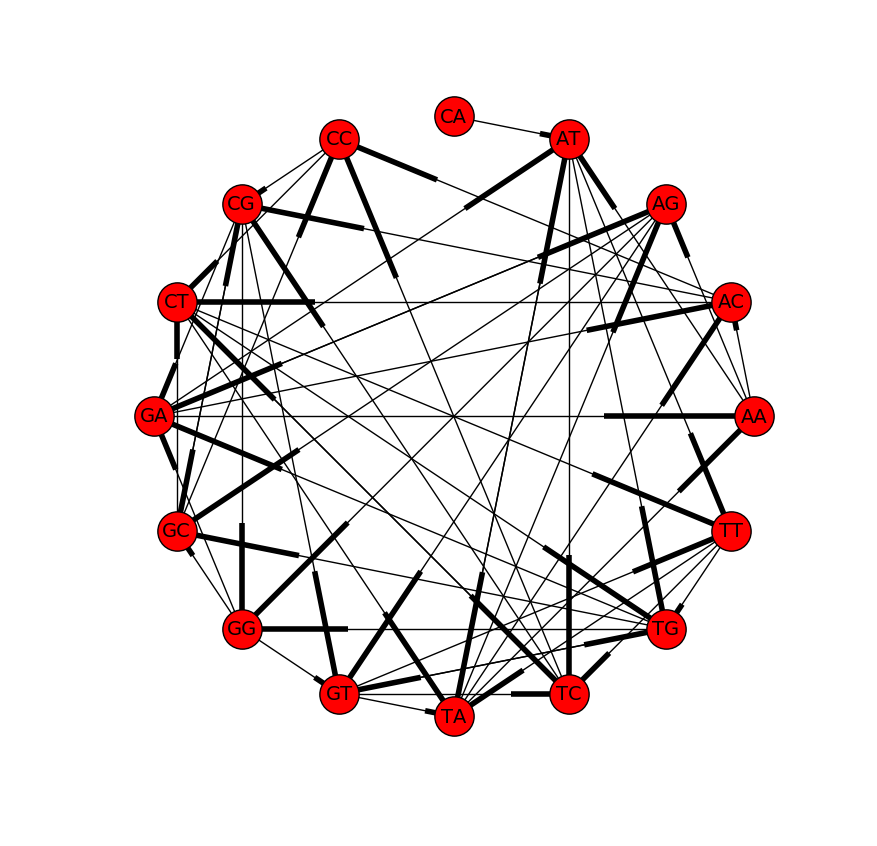

In [9]:
import itertools
import networkx as nx
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy

kmer = [''.join(kmer) for kmer in itertools.product("ACGT", repeat=2)]
N = len(kmer)
G = nx.DiGraph()
G.add_nodes_from(range(N))

for i in xrange(N):
    for j in xrange(N):
        if kmer[j] == "CA":
            continue
        if kmer[i] == "CA":
            if kmer[j] != "AT":
                continue
        if (kmer[i][1:] == kmer[j][:-1]):
            G.add_edge(i, j)

plt.figure(figsize=(8,8))
t = numpy.arange(0.0, 2.0*numpy.pi, 2.0*numpy.pi/N) 
pos = dict(zip(range(N), zip(300*numpy.cos(t), 300*numpy.sin(t))))
nx.draw(G, pos, node_size=800, arrows=True)
nx.draw_networkx_labels(G,pos,dict(zip(range(N),kmer)),font_size=14)
plt.show()

<p style="text-align: right; clear: right; margin-right: 200px;">22</p>

# Next Time

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Drowning.gif" width="700px" class="centerImg">

* Code that solves our graph problems
* Consider which code is simplier
* Consider which code is Faster

<p style="text-align: right; clear: right; margin-right: 200px;">23</p>